In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.decomposition import PCA 


In [2]:
data=pd.read_csv("/content/CC GENERAL.csv")

In [3]:
data.sample(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8411,C18637,5934.610587,1.000000,0.00,0.00,0.00,302.678437,0.000000,0.000000,0.000000,0.250000,5,0,6000.0,1065.956065,2394.242819,0.000000,12
6746,C16934,1250.526799,1.000000,2576.81,2576.81,0.00,599.535996,0.583333,0.583333,0.000000,0.166667,2,34,3750.0,3811.567017,3536.319962,0.090909,12
1558,C11610,3232.346639,1.000000,0.00,0.00,0.00,172.063782,0.000000,0.000000,0.000000,0.333333,8,0,3500.0,664.715954,1567.921939,0.000000,12
2976,C13064,3294.951011,1.000000,2923.07,2762.00,161.07,3801.850865,1.000000,0.916667,0.583333,0.166667,2,35,13000.0,6320.790788,1002.946812,0.000000,12
2209,C12278,28.924276,1.000000,324.60,0.00,324.60,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,3000.0,320.218246,174.119970,0.833333,12
7552,C17756,144.436235,0.181818,0.00,0.00,0.00,944.893512,0.000000,0.000000,0.000000,0.083333,1,0,1000.0,542.036637,365.765347,0.000000,12
4258,C14376,13.713339,0.636364,504.08,137.90,366.18,0.000000,0.583333,0.083333,0.500000,0.000000,0,11,4500.0,448.622511,76.110182,0.400000,12
6586,C16767,1667.851788,0.900000,0.00,0.00,0.00,5133.373227,0.000000,0.000000,0.000000,0.600000,13,0,3000.0,2822.457351,471.885081,0.125000,10
5240,C15387,566.477136,1.000000,5370.39,1129.30,4241.09,0.000000,1.000000,0.500000,1.000000,0.000000,0,60,5700.0,4124.004704,224.493971,0.500000,12
1343,C11388,319.388468,1.000000,1674.90,689.23,985.67,0.000000,1.000000,1.000000,0.833333,0.000000,0,24,7500.0,1907.796411,194.793488,0.083333,12


In [5]:
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mode()[0],inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mode()[0],inplace=True)

In [7]:
print(data.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [8]:
data = data.drop(["CUST_ID"], axis=1)
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric


In [11]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative.value_counts()

0    8920
2      20
1       7
4       2
3       1
dtype: int64

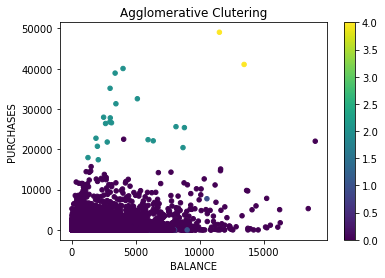

In [12]:
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter (data ['BALANCE'] , data ["PURCHASES"] , c= agglomerative[0], s=20)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

KeyboardInterrupt: ignored

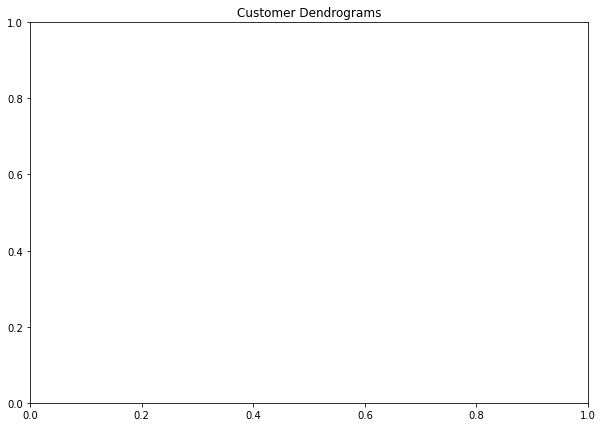

In [19]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))

In [14]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=3, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [15]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,1
3,1
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [16]:
labels.value_counts()

0    6524
1    2295
2     131
dtype: int64

In [17]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[8.55105357e+02 8.54347661e-01 6.05315790e+02 3.13716049e+02
  2.91898298e+02 4.94593159e+02 4.67783050e-01 1.54304175e-01
  3.52426152e-01 1.06694625e-01 2.25126398e+00 1.06831622e+01
  2.74920692e+03 9.98442641e+02 5.61099633e+02 1.56959713e-01
  1.14334304e+01]
 [3.39913631e+03 9.40687508e-01 1.58164065e+03 9.87815816e+02
  5.94137203e+02 2.11721606e+03 5.39932381e-01 3.17116044e-01
  3.85206273e-01 2.10963305e-01 5.75087260e+00 2.21278360e+01
  9.00816080e+03 2.89026733e+03 1.55711584e+03 1.34225813e-01
  1.17377836e+01]
 [4.80882923e+03 9.09847656e-01 1.07073796e+04 7.56195397e+03
  3.14559359e+03 5.19105119e+03 7.47270397e-01 5.95595015e-01
  5.99510939e-01 2.26083061e-01 9.17557252e+00 8.55496183e+01
  1.24660305e+04 1.80939666e+04 2.49345210e+03 3.33011382e-01
  1.18396947e+01]]


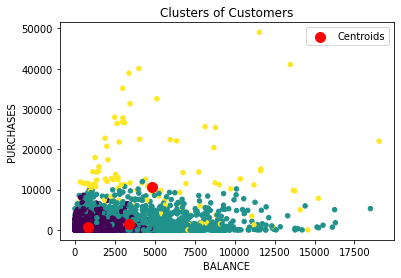

In [20]:
plt.scatter(data["BALANCE"],          
            data["PURCHASES"],s=20,c=labels[:])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

# PCA

In [21]:
pca_t = PCA(2)
pca_t.fit(data)
pca_result = pca_t.transform(data)

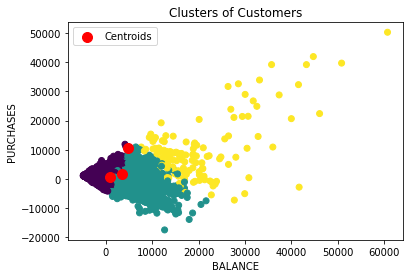

In [22]:
plt.scatter(pca_result[:,0],pca_result[:,1], c=labels[:] )
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s=100, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In [25]:
t = []
K = range(1,18)
for i in K:
    km = KMeans(n_clusters=i)
    km = km.fit(data)
    t.append(km.inertia_)
    

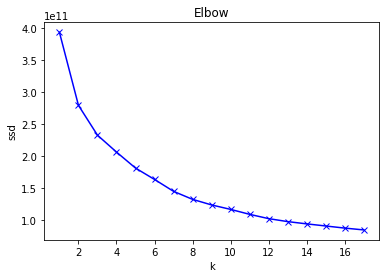

In [26]:
plt.plot(K,ssd,'bx-')
plt.xlabel('k')
plt.ylabel('ssd')
plt.title('Elbow')
plt.show()